<a href="https://colab.research.google.com/github/FaiazS/Chatbot-Assistant/blob/main/ChatBot_Assistant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Installing the required packages and dependencies

!pip install langchain

!pip install langchain_core

!pip install langchain_groq

!pip install langchain_community

!pip install langgraph

!pip install langsmith

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.7/126.7 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.4/142.4 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 kB 16.6 MB/s eta 0:00:00


In [2]:
!pip install groq

In [3]:
#Initializing the ChatBot Structure

from typing import Annotated

from typing_extensions import TypedDict

from langchain_groq import ChatGroq

from langgraph.graph import StateGraph, START, END

from langgraph.graph.message import add_messages

from langgraph.checkpoint.memory import MemorySaver

from groq import Groq

class State(TypedDict):

  messages : Annotated[list, add_messages]

chatbot = StateGraph(State)

chatbot_memory = MemorySaver()

In [4]:
#Defining the function(the task to be performed in that node) of the node of the chatbot graph and then adding the node to the chatbot graph

def chatbot_node(state : State):

  llm_model = ChatGroq(api_key = "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", model = "llama-3.3-70b-versatile")

  llm_model_response = llm_model.invoke(state["messages"])

  return {"messages" : llm_model_response.content}

In [5]:
chatbot.add_node("chatbot_node", chatbot_node)

In [6]:
#Adding the Entry Edge to the chatbot graph

chatbot.add_edge(START, "chatbot_node")

In [7]:
#Adding the Exit Edge to the chatbot graph

chatbot.add_edge("chatbot_node", END)

In [8]:
#Memory Saver to retain context of inputs of user and responses of the chatbot.
chatbot_memory = MemorySaver()

chatbot = chatbot.compile(checkpointer= chatbot_memory)

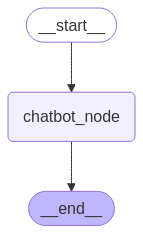

In [9]:
#Displaying the Chatbot graph structure

from IPython.display import Image, display

try:

  display(Image(chatbot.get_graph().draw_mermaid_png()))

except Exception:

  pass

In [10]:
#Enabling LangSmith and LangSmith tracing

!pip install -U langchain langchain-community transformers ctransformers

LANGSMITH_TRACING=True
LANGSMITH_ENDPOINT="https://api.smith.langchain.com"
LANGSMITH_API_KEY="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"
LANGSMITH_PROJECT="chatbot_project"


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 3.1 MB/s eta 0:00:00


In [11]:
#Running the chatbot integrated with the LLM with integrated Memory Saver to retain context of previous inputs and chatbot responses.

while True:

  user_input = input("User: ")

  if user_input == "Q":

    break

  config = {"configurable" : {"thread_id" : "1"}}

  chatbot_response = chatbot.invoke({"messages": user_input}, config)

  print("Chatbot Assistant: ", chatbot_response["messages"][-1].content)

User: Hi
Chatbot Assistant:  It's nice to meet you. Is there something I can help you with or would you like to chat?
User: My name is Faiaz
Chatbot Assistant:  Nice to meet you too, Faiaz. It's lovely to have you here. I'm happy to chat with you about anything that's on your mind or just have a casual conversation. How's your day going so far?
User: My name is?
Chatbot Assistant:  You already told me, Faiaz. Your name is Faiaz. Is there something else you'd like to talk about or ask?
User: Ok thanks cya later
Chatbot Assistant:  It was nice chatting with you, Faiaz. Have a great day and feel free to come back and talk anytime you'd like. Bye for now.
User: Q


In [12]:
#Integrating in to ChatBot the Web Search Tool to Search the Web and Provide Recent and Up to Date Information

import os

from google.colab import userdata

from langchain_community.tools import TavilySearchResults

os.environ["TAVILY_API_KEY"] = userdata.get('TAVILY_WEB_SEARCH_API_KEY')

web_search_tool = TavilySearchResults(

                                      max_results = 7,

                                      search_depth = 'advanced',

                                      include_answer = True,

                                      include_raw_content = False,

                                      include_image_content = True

)

chatbot_tools = [web_search_tool]

web_search_tool.invoke("Get me the IPL 2025 Schedule")

[{'title': 'IPL 2025 Schedule - Business Standard',
  'url': 'https://www.business-standard.com/cricket/ipl/schedule',
  'content': "The much-awaited Indian Premier League (IPL) 2025 is set to kick off on March 22, 2025, with the final match scheduled for May 25, 2025, at Kolkata's Eden",
  'score': 0.9049283},
 {'title': 'IPL 2025 schedule: The complete match list - Olympics.com',
  'url': 'https://www.olympics.com/en/news/indian-premier-league-ipl-2025-schedule-match-list',
  'content': 'Three teams will play their home matches at two different venues -- Delhi Capitals (Visakhapatnam and New Delhi), Punjab Kings (Chandigarh and Dharamsala) and Rajasthan Royals (Guwahati and Jaipur).\nThe IPL 2025 schedule includes 12 double headers, with the afternoon matches slated to start at 3:30 PM. The matches in evening will begin at 7:30 PM.\nRelated content [...] The IPL 2025 season will kick off on March 22, the Board of Control for Cricket in India (BCCI) announced on Sunday.\nInto its 18th

In [13]:
#Updating the Chatbot with web search feature

from typing import Annotated

from langchain_community.tools.tavily_search import TavilySearchResults

from langchain_core.messages import BaseMessage

from langchain_groq import ChatGroq

from typing_extensions import TypedDict

from google.colab import userdata

from langgraph.graph import StateGraph, START, END

from langgraph.graph.message import add_messages

from langgraph.prebuilt import ToolNode, tools_condition

In [14]:
class State(TypedDict):

    messages : Annotated[list, add_messages]

chatbot = StateGraph(State)

In [15]:
web_search_tool = TavilySearchResults(max_results = 7)

tools = [web_search_tool]

llm_model = ChatGroq(api_key = "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", model = "llama-3.3-70b-versatile")

llm_model_integrated_with_web_search_tool = llm_model.bind_tools(tools)

In [16]:
def chatbot_node(state: State):

  return {"messages": [llm_model_integrated_with_web_search_tool.invoke(state["messages"])]}

In [17]:
chatbot.add_node("chatbot_node", chatbot_node)

tool_node = ToolNode(tools = [web_search_tool])

chatbot.add_node("tools", tool_node)

chatbot.add_conditional_edges("chatbot_node", tools_condition)

chatbot.add_edge("tools" , "chatbot_node")

chatbot.add_edge(START, "chatbot_node")

chatbot = chatbot.compile(checkpointer = chatbot_memory)

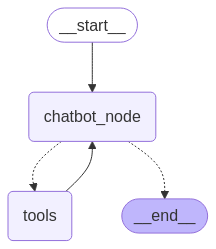

In [18]:
from IPython.display import Image, display

try:

  display(Image(chatbot.get_graph().draw_mermaid_png()))

except Exception:

  pass

In [19]:
while True:

  user_input = input("User:")

  if user_input == "Q":

    break

  config = {"configurable" : {"thread_id" : "1"}}

  chatbot_response = chatbot.invoke({"messages" : user_input}, config)

  print("Chatbot Assistant: ", chatbot_response["messages"][-1].content)

User:Hey
Chatbot Assistant:  It's nice to see you again, Faiaz. What brings you back here today? Want to pick up where we left off or start a new conversation?
User:Get me the IPL Schedule of 2025
Chatbot Assistant:  The IPL schedule for 2025 is as follows:

* The tournament will start on March 22, 2025, and the final will be played on May 25, 2025.
* There are 10 teams participating in the tournament, and they will play a total of 74 matches.
* The matches will be played at 13 different venues across India.
* The schedule includes 12 double headers, with the afternoon matches starting at 3:30 PM and the evening matches starting at 7:30 PM.

Here is the detailed schedule:

* March 22, 2025: Kolkata Knight Riders vs Royal Challengers Bengaluru (Eden Gardens, Kolkata)
* March 23, 2025: Mumbai Indians vs Chennai Super Kings (Wankhede Stadium, Mumbai)
* March 24, 2025: Delhi Capitals vs Rajasthan Royals (Arun Jaitley Stadium, Delhi)
* March 25, 2025: Punjab Kings vs Sunrisers Hyderabad (Ma

In [20]:
#Defining the User Interface for the Chatbot

!pip install streamlit

import streamlit as st

st.title("Chatbot Assistant")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.7 MB/s eta 0:00:00


2025-04-03 20:40:05.295 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-03 20:40:05.441 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-04-03 20:40:05.441 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [28]:
#Streaming chat messages

if "messages" not in st.session_state:

  st.session_state.messages = []

def stream_chat_messages(user_input : str):

  st.session_state.messages.append({"role" : "user", "content" : user_input})

  with st.chat_message("user"):

    st.markdown(user_input)

  config = {"configurable" : {"thread_id ": "1"}}

  chatbot_assistant_response = chatbot.invoke({"messages" : user_input}, config)

  new_response = chatbot_assistant_response["messages"][-1].content

  with st.chat_message("assistant"):

    message_placeholder = st.empty()

    with st.spinner("Generating response..."):

      chatbot_assistant_response = chatbot.invoke({"messages": user_input}, config)

    new_response = chatbot_assistant_response["messages"][-1].content

  streaming_response = ""

  for character in new_response:

        streaming_response += character

        st.message_placeholder.markdown(streaming_response)

  st.session_state.messages.append({"role": "assistant", "content" : streaming_response})

2025-04-03 21:20:42.690 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [31]:
#Displaying chat history

for message in st.session_state.messages:

  with st.chat_message(message["role"]):

    st.markdown(message["content"])

#Chat input handling

if prompt := st.chat_input("How may I assist you?"):

  #Displaying user input as a chat message
  #with st.chat_message("user"):

    #st.markdown(prompt)

  #Appending user input to session state
  st.session_state.messages.append({"role" : "user", "content" : prompt})

  stream_chat_messages(prompt)

2025-04-03 21:22:49.672 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-03 21:22:49.673 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-03 21:22:49.674 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-03 21:22:49.674 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-03 21:22:49.675 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-03 21:22:49.676 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [32]:
!pip install pyngrok

from pyngrok import ngrok

In [33]:
%%writefile ChatBot_Assistant.py

Overwriting ChatBot_Assistant.py


In [34]:
!ngrok auth_token 2vBNt35fG5TfQ0uYDbRwzoFEeDg_7HvUyhtbmV2AKbqdtHPiq

ngrok - tunnel local ports to public URLs and inspect traffic

USAGE:
  ngrok [command] [flags]

COMMANDS: 
  config          update or migrate ngrok's configuration file
  http            start an HTTP tunnel
  tcp             start a TCP tunnel
  tunnel          start a tunnel for use with a tunnel-group backend

EXAMPLES: 
  ngrok http 80                                                 # secure public URL for port 80 web server
  ngrok http --url baz.ngrok.dev 8080                           # port 8080 available at baz.ngrok.dev
  ngrok tcp 22                                                  # tunnel arbitrary TCP traffic to port 22
  ngrok http 80 --oauth=google --oauth-allow-email=foo@foo.com  # secure your app with oauth

Paid Features: 
  ngrok http 80 --url mydomain.com                              # run ngrok with your own custom domain
  ngrok http 80 --cidr-allow 2600:8c00::a03c:91ee:fe69:9695/32  # run ngrok with IP policy restrictions
  Upgrade your account at https://dash

In [35]:
from google.colab import userdata

ngrok.set_auth_token(userdata.get('ngrok_auth_token'))

ngrok.kill()

active_tunnels = ngrok.get_tunnels()

for tunnel in active_tunnels:

  print(f"Closing existing tunnel : {tunnel.public_url}")
  ngrok.disconnect(tunnel.public_url)

public_url = ngrok.connect(8501).public_url

print(f"Your App is running on url : {public_url}")

!streamlit run "ChatBot_Assistant.py"

Your App is running on url : https://4013-34-147-12-162.ngrok-free.app



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.147.12.162:8501



  Stopping...
  Stopping...
